# **Generating data**

In [5]:
import numpy as np

# Generate random data
n = 100
p = 100
X = np.random.randn(n,p)
epsilon = np.random.randn(n,1)
beta = np.zeros((p,1))
beta[0:8] = 10*np.random.rand(8,1)
Y = X.dot(beta) + epsilon


# **Fitting a Lasso model**

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

alpha = 0.1
clf = Lasso(alpha)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)

print(mse)



1.809707117665926


# **K-fold cross-validation**

In [19]:
from sklearn.model_selection import KFold


K=10 #K-foldCV
alphas = np.array([0.1, 1, 2])

N = len(alphas) # Number of lasso parameters
scores = np.zeros((N,K))
kf = KFold(n_splits=10)

for i in range(N):
   clf = Lasso(alphas[i])
   for j, (train, test) in enumerate(kf.split(X)):
      X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
      clf.fit(X_train,Y_train)
      Y_pred = clf.predict(X_test)

      scores[i,j] = mean_squared_error(Y_test, Y_pred)

# Compute average CV score for each parameter
scores_avg = scores.mean(axis=1)

array([ 1.28561792,  9.48156883, 27.85589978])

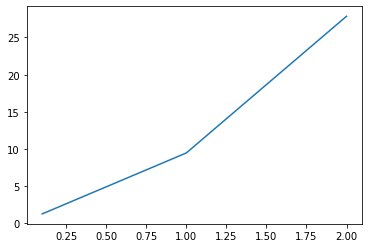

In [22]:
import matplotlib.pyplot as plt
plt.plot(alphas, scores_avg)

scores_avg